## Random Forest - GASIF H2/CO - 2bins - 50/50

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, cohen_kappa_score, r2_score, mean_absolute_error, root_mean_squared_error
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn import metrics
import pycm
from ast import literal_eval
import sys
sys.path.append("../plotutils/")
from plotutils import *
plt.style.use("../plotutils/your.mplstyle")

In [2]:
df = pd.read_csv(f"../GasificationBiomass_dataset.csv", sep=';')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   BIOMASS_name         50 non-null     object 
 1   BIOMASS              50 non-null     object 
 2   HHVbiom (MJ/kg)      50 non-null     float64
 3   C (%)                50 non-null     float64
 4   H (%)                50 non-null     float64
 5   O (%)                50 non-null     float64
 6   ash (%)              50 non-null     float64
 7   VM (%)               50 non-null     float64
 8   FC (%)               50 non-null     float64
 9   MC (%)               50 non-null     float64
 10  volCO (%)            50 non-null     float64
 11  volH2 (%)            50 non-null     float64
 12  volCH4 (%)           50 non-null     float64
 13  volCO2 (%)           50 non-null     float64
 14  volCOMB (%)          50 non-null     float64
 15  H2_CO                50 non-null     float

In [3]:
def prepare_dataset_classification(
    df,
    target = "H2_CO_1.4",
    representation = list(df.iloc[:,2:10].columns),
    random_state=42,
    train_size=30
):
    df_train, df_test = train_test_split(
        df,
        train_size=train_size,
        random_state=random_state,
        stratify=df[target].astype(int).values,
    )
    print(len(df_train), len(df_test))
    
    X_train, y_train = df_train[representation], df_train[target]
    X_test, y_test = df_test[representation], df_test[target]
    
    return X_train, y_train, X_test, y_test

In [4]:
def train_and_evaluate_classifier(X_train, y_train, X_test, y_test, random_state=42):
    clf = RandomForestClassifier(
        n_estimators=200, 
        random_state=random_state,
        verbose=True
    )
    
    clf.fit(X_train, y_train)
    
    y_pred = clf.predict(X_test)
    y_test = np.array(y_test)
    
    acc = accuracy_score(y_test, y_pred)
    f1_macro = f1_score(y_test, y_pred, average="macro")
    f1_micro = f1_score(y_test, y_pred, average="micro")
    f1_weighted = f1_score(y_test, y_pred, average='weighted')
    kappa = cohen_kappa_score(y_test, y_pred)
    
    return y_test, y_pred, acc, f1_macro, f1_micro, f1_weighted, kappa

In [5]:
def metrics_dict():
    metrics_dict = {
        "train_size": train_size,
        "y_true": y_test_all,
        "y_pred": y_pred_all,
        "accuracy": acc_scores,
        "f1_macro": f1macro_scores,
        "f1_micro": f1micro_scores,
        "f1_weighted": f1weighted_scores,
        "kappa": kappa_scores
    }
    return metrics_dict

### training size = 5

In [6]:
train_size = 5
iterations = 10
y_test_all = []
y_pred_all = []
acc_scores = []
f1macro_scores = []
f1micro_scores = []
f1weighted_scores = []
kappa_scores = []

In [7]:
for n in range(iterations):
    print(f"-------------Iteration {n + 1}/{iterations}")
    random_state=42+n

    X_train, y_train, X_test, y_test = prepare_dataset_classification(
        df,
        random_state=random_state,
        train_size=train_size
    )
    print(f"random_state = {random_state}")

    y_test, y_pred, acc, f1_macro, f1_micro, f1_weighted, kappa = train_and_evaluate_classifier(
        X_train, 
        y_train, 
        X_test, 
        y_test, 
        random_state=random_state
    )
    
    y_test_all.append(y_test)
    y_pred_all.append(y_pred)    
    acc_scores.append(acc)
    f1macro_scores.append(f1_macro)
    f1micro_scores.append(f1_micro)
    f1weighted_scores.append(f1_weighted)
    kappa_scores.append(kappa)
    print(f"Accuracy: {acc}")
    print(f"F1 macro: {f1_macro}")
    print(f"F1 micro: {f1_micro}")
    print(f"F1 weighted: {f1_weighted}")
    print(f"Kappa: {kappa}")

-------------Iteration 1/10
5 45
random_state = 42
Accuracy: 0.4888888888888889
F1 macro: 0.48481831757093086
F1 micro: 0.4888888888888889
F1 weighted: 0.4838006747414413
Kappa: -0.017699115044247815
-------------Iteration 2/10
5 45
random_state = 43


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


Accuracy: 0.5777777777777777
F1 macro: 0.5769421078673924
F1 micro: 0.5777777777777777
F1 weighted: 0.5773599428225851
Kappa: 0.1543026706231453
-------------Iteration 3/10
5 45
random_state = 44
Accuracy: 0.7111111111111111
F1 macro: 0.6801530891197376
F1 micro: 0.7111111111111111
F1 weighted: 0.6823643764048357
Kappa: 0.4144144144144145
-------------Iteration 4/10


[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


5 45
random_state = 45


[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s


Accuracy: 0.6222222222222222
F1 macro: 0.6153846153846154
F1 micro: 0.6222222222222222
F1 weighted: 0.6142450142450143
Kappa: 0.24926398429833174
-------------Iteration 5/10
5 45
random_state = 46
Accuracy: 0.6888888888888889
F1 macro: 0.6759259259259259
F1 micro: 0.6888888888888889
F1 weighted: 0.6744855967078189
Kappa: 0.3835616438356164
-------------Iteration 6/10
5 45
random_state = 47


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


Accuracy: 0.6222222222222222
F1 macro: 0.567552289429056
F1 micro: 0.6222222222222222
F1 weighted: 0.564135418629483
Kappa: 0.2565597667638484
-------------Iteration 7/10
5 45
random_state = 48
Accuracy: 0.8222222222222222
F1 macro: 0.8200000000000001
F1 micro: 0.8222222222222222
F1 weighted: 0.8204444444444445
Kappa: 0.6428571428571428
-------------Iteration 8/10
5 45
random_state = 49


[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s


Accuracy: 0.7777777777777778
F1 macro: 0.7767857142857142
F1 micro: 0.7777777777777778
F1 weighted: 0.7764550264550264
Kappa: 0.5570866141732284
-------------Iteration 9/10
5 45
random_state = 50
Accuracy: 0.6888888888888889
F1 macro: 0.6691176470588236
F1 micro: 0.6888888888888889
F1 weighted: 0.6673202614379086
Kappa: 0.3847656249999999
-------------Iteration 10/10
5 45
random_state = 51
Accuracy: 0.6888888888888889
F1 macro: 0.6759259259259259
F1 micro: 0.6888888888888889
F1 weighted: 0.6744855967078189
Kappa: 0.3835616438356164


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s


In [8]:
print(f"FINAL REPORT for training size = {train_size}")

print(f"mean accuracy: {np.mean(acc_scores)} +/- {np.std(acc_scores)}")
print(f"mean F1 macro: {np.mean(f1macro_scores)} +/- {np.std(f1macro_scores)}")
print(f"mean F1 micro: {np.mean(f1micro_scores)} +/- {np.std(f1micro_scores)}")
print(f"mean F1 weighted: {np.mean(f1weighted_scores)} +/- {np.std(f1weighted_scores)}")
print(f"mean Kappa: {np.mean(kappa_scores)} +/- {np.std(kappa_scores)}")

FINAL REPORT for training size = 5
mean accuracy: 0.668888888888889 +/- 0.09132765594682009
mean F1 macro: 0.6542605632568121 +/- 0.09382451037999948
mean F1 micro: 0.668888888888889 +/- 0.09132765594682009
mean F1 weighted: 0.6535096352596377 +/- 0.09434801488807214
mean Kappa: 0.34086743907570954 +/- 0.18105404566535957


In [9]:
compiled_res_5 = pd.DataFrame(metrics_dict())
compiled_res_5.head(3)

,train_size,y_true,y_pred,accuracy,f1_macro,f1_micro,f1_weighted,kappa
0,5,"[1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, ...","[0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, ...",0.488889,0.484818,0.488889,0.483801,-0.017699
1,5,"[1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, ...","[0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, ...",0.577778,0.576942,0.577778,0.577360,0.154303
2,5,"[0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, ...","[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, ...",0.711111,0.680153,0.711111,0.682364,0.414414


### training size = 10

In [10]:
train_size = 10
iterations = 10
y_test_all = []
y_pred_all = []
acc_scores = []
f1macro_scores = []
f1micro_scores = []
f1weighted_scores = []
kappa_scores = []

In [11]:
for n in range(iterations):
    print(f"-------------Iteration {n + 1}/{iterations}")
    random_state=42+n

    X_train, y_train, X_test, y_test = prepare_dataset_classification(
        df,
        random_state=random_state,
        train_size=train_size
    )
    print(f"random_state = {random_state}")

    y_test, y_pred, acc, f1_macro, f1_micro, f1_weighted, kappa = train_and_evaluate_classifier(
        X_train, 
        y_train, 
        X_test, 
        y_test, 
        random_state=random_state
    )
    
    y_test_all.append(y_test)
    y_pred_all.append(y_pred)    
    acc_scores.append(acc)
    f1macro_scores.append(f1_macro)
    f1micro_scores.append(f1_micro)
    f1weighted_scores.append(f1_weighted)
    kappa_scores.append(kappa)
    print(f"Accuracy: {acc}")
    print(f"F1 macro: {f1_macro}")
    print(f"F1 micro: {f1_micro}")
    print(f"F1 weighted: {f1_weighted}")
    print(f"Kappa: {kappa}")

-------------Iteration 1/10
10 40
random_state = 42
Accuracy: 0.85
F1 macro: 0.8484848484848485
F1 micro: 0.85
F1 weighted: 0.8484848484848484
Kappa: 0.7
-------------Iteration 2/10
10 40
random_state = 43


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s


Accuracy: 0.7
F1 macro: 0.7
F1 micro: 0.7
F1 weighted: 0.7
Kappa: 0.4
-------------Iteration 3/10
10 40
random_state = 44
Accuracy: 0.85
F1 macro: 0.85
F1 micro: 0.85
F1 weighted: 0.85
Kappa: 0.7
-------------Iteration 4/10
10 40
random_state = 45


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


Accuracy: 0.825
F1 macro: 0.8248905565978737
F1 micro: 0.825
F1 weighted: 0.8248905565978737
Kappa: 0.65
-------------Iteration 5/10
10 40
random_state = 46


[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s


Accuracy: 0.7
F1 macro: 0.6930946291560103
F1 micro: 0.7
F1 weighted: 0.6930946291560102
Kappa: 0.4
-------------Iteration 6/10
10 40
random_state = 47
Accuracy: 0.7
F1 macro: 0.6875
F1 micro: 0.7
F1 weighted: 0.6875
Kappa: 0.4
-------------Iteration 7/10
10 40
random_state = 48


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s


Accuracy: 0.75
F1 macro: 0.7395833333333333
F1 micro: 0.75
F1 weighted: 0.7395833333333333
Kappa: 0.5
-------------Iteration 8/10
10 40
random_state = 49
Accuracy: 0.85
F1 macro: 0.849624060150376
F1 micro: 0.85
F1 weighted: 0.849624060150376
Kappa: 0.7
-------------Iteration 9/10
10 40
random_state = 50


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


Accuracy: 0.75
F1 macro: 0.7474747474747474
F1 micro: 0.75
F1 weighted: 0.7474747474747474
Kappa: 0.5
-------------Iteration 10/10
10 40
random_state = 51
Accuracy: 0.7
F1 macro: 0.6992481203007519
F1 micro: 0.7
F1 weighted: 0.6992481203007519
Kappa: 0.4


[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s


In [12]:
print(f"FINAL REPORT for training size = {train_size}")

print(f"mean accuracy: {np.mean(acc_scores)} +/- {np.std(acc_scores)}")
print(f"mean F1 macro: {np.mean(f1macro_scores)} +/- {np.std(f1macro_scores)}")
print(f"mean F1 micro: {np.mean(f1micro_scores)} +/- {np.std(f1micro_scores)}")
print(f"mean F1 weighted: {np.mean(f1weighted_scores)} +/- {np.std(f1weighted_scores)}")
print(f"mean Kappa: {np.mean(kappa_scores)} +/- {np.std(kappa_scores)}")

FINAL REPORT for training size = 10
mean accuracy: 0.7675 +/- 0.06523994175349945
mean F1 macro: 0.763990029549794 +/- 0.06753570412018163
mean F1 micro: 0.7675 +/- 0.06523994175349945
mean F1 weighted: 0.763990029549794 +/- 0.06753570412018163
mean Kappa: 0.535 +/- 0.13047988350699885


In [13]:
compiled_res_10 = pd.DataFrame(metrics_dict())
compiled_res_10.head(3)

,train_size,y_true,y_pred,accuracy,f1_macro,f1_micro,f1_weighted,kappa
0,10,"[1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, ...","[1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, ...",0.85,0.848485,0.85,0.848485,0.7
1,10,"[1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, ...","[1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, ...",0.70,0.700000,0.70,0.700000,0.4
2,10,"[0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, ...","[1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, ...",0.85,0.850000,0.85,0.850000,0.7


### training size = 15

In [14]:
train_size = 15
iterations = 10
y_test_all = []
y_pred_all = []
acc_scores = []
f1macro_scores = []
f1micro_scores = []
f1weighted_scores = []
kappa_scores = []

In [15]:
for n in range(iterations):
    print(f"-------------Iteration {n + 1}/{iterations}")
    random_state=42+n

    X_train, y_train, X_test, y_test = prepare_dataset_classification(
        df,
        random_state=random_state,
        train_size=train_size
    )
    print(f"random_state = {random_state}")

    y_test, y_pred, acc, f1_macro, f1_micro, f1_weighted, kappa = train_and_evaluate_classifier(
        X_train, 
        y_train, 
        X_test, 
        y_test, 
        random_state=random_state
    )
    
    y_test_all.append(y_test)
    y_pred_all.append(y_pred)    
    acc_scores.append(acc)
    f1macro_scores.append(f1_macro)
    f1micro_scores.append(f1_micro)
    f1weighted_scores.append(f1_weighted)
    kappa_scores.append(kappa)
    print(f"Accuracy: {acc}")
    print(f"F1 macro: {f1_macro}")
    print(f"F1 micro: {f1_micro}")
    print(f"F1 weighted: {f1_weighted}")
    print(f"Kappa: {kappa}")

-------------Iteration 1/10
15 35
random_state = 42
Accuracy: 0.8571428571428571
F1 macro: 0.8571428571428571
F1 micro: 0.8571428571428571
F1 weighted: 0.8571428571428571
Kappa: 0.7145187601957586
-------------Iteration 2/10
15 35
random_state = 43


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s


Accuracy: 0.8
F1 macro: 0.7993447993447993
F1 micro: 0.8
F1 weighted: 0.7996723996723997
Kappa: 0.5990180032733223
-------------Iteration 3/10
15 35
random_state = 44
Accuracy: 0.8285714285714286
F1 macro: 0.8214285714285714
F1 micro: 0.8285714285714286
F1 weighted: 0.8224489795918367
Kappa: 0.6534653465346534
-------------Iteration 4/10
15 35
random_state = 45


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s


Accuracy: 0.8
F1 macro: 0.7993447993447993
F1 micro: 0.8
F1 weighted: 0.799017199017199
Kappa: 0.6016260162601627
-------------Iteration 5/10
15 35
random_state = 46


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s


Accuracy: 0.8
F1 macro: 0.8
F1 micro: 0.8
F1 weighted: 0.8
Kappa: 0.6003262642740621
-------------Iteration 6/10
15 35
random_state = 47


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


Accuracy: 0.6571428571428571
F1 macro: 0.6499999999999999
F1 micro: 0.6571428571428571
F1 weighted: 0.6485714285714285
Kappa: 0.3203883495145632
-------------Iteration 7/10
15 35
random_state = 48
Accuracy: 0.7428571428571429
F1 macro: 0.7286821705426356
F1 micro: 0.7428571428571429
F1 weighted: 0.7304540420819491
Kappa: 0.47933884297520657
-------------Iteration 8/10
15 35
random_state = 49


[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s


Accuracy: 0.8
F1 macro: 0.7973531844499586
F1 micro: 0.8
F1 weighted: 0.798014888337469
Kappa: 0.5977011494252873
-------------Iteration 9/10
15 35
random_state = 50


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s


Accuracy: 0.8285714285714286
F1 macro: 0.8284313725490196
F1 micro: 0.8285714285714286
F1 weighted: 0.8285714285714286
Kappa: 0.6568627450980391
-------------Iteration 10/10
15 35
random_state = 51
Accuracy: 0.8
F1 macro: 0.7993447993447993
F1 micro: 0.8
F1 weighted: 0.7996723996723997
Kappa: 0.5990180032733223


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s


In [16]:
print(f"FINAL REPORT for training size = {train_size}")

print(f"mean accuracy: {np.mean(acc_scores)} +/- {np.std(acc_scores)}")
print(f"mean F1 macro: {np.mean(f1macro_scores)} +/- {np.std(f1macro_scores)}")
print(f"mean F1 micro: {np.mean(f1micro_scores)} +/- {np.std(f1micro_scores)}")
print(f"mean F1 weighted: {np.mean(f1weighted_scores)} +/- {np.std(f1weighted_scores)}")
print(f"mean Kappa: {np.mean(kappa_scores)} +/- {np.std(kappa_scores)}")

FINAL REPORT for training size = 15
mean accuracy: 0.7914285714285714 +/- 0.05276052946462683
mean F1 macro: 0.788107255414744 +/- 0.05541929744953426
mean F1 micro: 0.7914285714285714 +/- 0.05276052946462683
mean F1 weighted: 0.7883565622658967 +/- 0.05567967908740821
mean Kappa: 0.5822263480824377 +/- 0.10430684929580425


In [17]:
compiled_res_15 = pd.DataFrame(metrics_dict())
compiled_res_15.head(3)

,train_size,y_true,y_pred,accuracy,f1_macro,f1_micro,f1_weighted,kappa
0,15,"[1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, ...","[1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, ...",0.857143,0.857143,0.857143,0.857143,0.714519
1,15,"[1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, ...","[1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, ...",0.800000,0.799345,0.800000,0.799672,0.599018
2,15,"[1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, ...","[0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, ...",0.828571,0.821429,0.828571,0.822449,0.653465


### training size = 20

In [18]:
train_size = 20
iterations = 10
y_test_all = []
y_pred_all = []
acc_scores = []
f1macro_scores = []
f1micro_scores = []
f1weighted_scores = []
kappa_scores = []

In [19]:
for n in range(iterations):
    print(f"-------------Iteration {n + 1}/{iterations}")
    random_state=42+n

    X_train, y_train, X_test, y_test = prepare_dataset_classification(
        df,
        random_state=random_state,
        train_size=train_size
    )
    print(f"random_state = {random_state}")

    y_test, y_pred, acc, f1_macro, f1_micro, f1_weighted, kappa = train_and_evaluate_classifier(
        X_train, 
        y_train, 
        X_test, 
        y_test, 
        random_state=random_state
    )
    
    y_test_all.append(y_test)
    y_pred_all.append(y_pred)    
    acc_scores.append(acc)
    f1macro_scores.append(f1_macro)
    f1micro_scores.append(f1_micro)
    f1weighted_scores.append(f1_weighted)
    kappa_scores.append(kappa)
    print(f"Accuracy: {acc}")
    print(f"F1 macro: {f1_macro}")
    print(f"F1 micro: {f1_micro}")
    print(f"F1 weighted: {f1_weighted}")
    print(f"Kappa: {kappa}")

-------------Iteration 1/10
20 30
random_state = 42
Accuracy: 0.8333333333333334
F1 macro: 0.8316498316498316
F1 micro: 0.8333333333333334
F1 weighted: 0.8316498316498316
Kappa: 0.6666666666666667
-------------Iteration 2/10
20 30
random_state = 43


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s


Accuracy: 0.7666666666666667
F1 macro: 0.7664071190211346
F1 micro: 0.7666666666666667
F1 weighted: 0.7664071190211346
Kappa: 0.5333333333333333
-------------Iteration 3/10
20 30
random_state = 44
Accuracy: 0.8666666666666667
F1 macro: 0.8666666666666667
F1 micro: 0.8666666666666667
F1 weighted: 0.8666666666666667
Kappa: 0.7333333333333334
-------------Iteration 4/10
20 30
random_state = 45


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


Accuracy: 0.7666666666666667
F1 macro: 0.7664071190211346
F1 micro: 0.7666666666666667
F1 weighted: 0.7664071190211346
Kappa: 0.5333333333333333
-------------Iteration 5/10
20 30
random_state = 46


[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


Accuracy: 0.8666666666666667
F1 macro: 0.8660714285714286
F1 micro: 0.8666666666666667
F1 weighted: 0.8660714285714285
Kappa: 0.7333333333333334
-------------Iteration 6/10
20 30
random_state = 47


[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s


Accuracy: 0.7333333333333333
F1 macro: 0.7285067873303167
F1 micro: 0.7333333333333333
F1 weighted: 0.7285067873303167
Kappa: 0.4666666666666667
-------------Iteration 7/10
20 30
random_state = 48
Accuracy: 0.7333333333333333
F1 macro: 0.7129186602870814
F1 micro: 0.7333333333333333
F1 weighted: 0.7129186602870814
Kappa: 0.4666666666666667
-------------Iteration 8/10
20 30
random_state = 49


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


Accuracy: 0.9
F1 macro: 0.899888765294772
F1 micro: 0.9
F1 weighted: 0.899888765294772
Kappa: 0.8
-------------Iteration 9/10
20 30
random_state = 50
Accuracy: 0.8666666666666667
F1 macro: 0.8660714285714286
F1 micro: 0.8666666666666667
F1 weighted: 0.8660714285714285
Kappa: 0.7333333333333334
-------------Iteration 10/10
20 30
random_state = 51


[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


Accuracy: 0.7666666666666667
F1 macro: 0.7643097643097643
F1 micro: 0.7666666666666667
F1 weighted: 0.7643097643097643
Kappa: 0.5333333333333333


[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s


In [20]:
print(f"FINAL REPORT for training size = {train_size}")

print(f"mean accuracy: {np.mean(acc_scores)} +/- {np.std(acc_scores)}")
print(f"mean F1 macro: {np.mean(f1macro_scores)} +/- {np.std(f1macro_scores)}")
print(f"mean F1 micro: {np.mean(f1micro_scores)} +/- {np.std(f1micro_scores)}")
print(f"mean F1 weighted: {np.mean(f1weighted_scores)} +/- {np.std(f1weighted_scores)}")
print(f"mean Kappa: {np.mean(kappa_scores)} +/- {np.std(kappa_scores)}")

FINAL REPORT for training size = 20
mean accuracy: 0.8100000000000002 +/- 0.05972157622389641
mean F1 macro: 0.8068897570723559 +/- 0.0631706395047363
mean F1 micro: 0.8100000000000002 +/- 0.05972157622389641
mean F1 weighted: 0.8068897570723559 +/- 0.06317063950473627
mean Kappa: 0.62 +/- 0.1194431524477928


In [21]:
compiled_res_20 = pd.DataFrame(metrics_dict())
compiled_res_20.head(3)

,train_size,y_true,y_pred,accuracy,f1_macro,f1_micro,f1_weighted,kappa
0,20,"[1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, ...","[0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, ...",0.833333,0.831650,0.833333,0.831650,0.666667
1,20,"[1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, ...","[1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, ...",0.766667,0.766407,0.766667,0.766407,0.533333
2,20,"[0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, ...","[0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, ...",0.866667,0.866667,0.866667,0.866667,0.733333


### training size = 25

In [22]:
train_size = 25
iterations = 10
y_test_all = []
y_pred_all = []
acc_scores = []
f1macro_scores = []
f1micro_scores = []
f1weighted_scores = []
kappa_scores = []

In [23]:
for n in range(iterations):
    print(f"-------------Iteration {n + 1}/{iterations}")
    random_state=42+n

    X_train, y_train, X_test, y_test = prepare_dataset_classification(
        df,
        random_state=random_state,
        train_size=train_size
    )
    print(f"random_state = {random_state}")

    y_test, y_pred, acc, f1_macro, f1_micro, f1_weighted, kappa = train_and_evaluate_classifier(
        X_train, 
        y_train, 
        X_test, 
        y_test, 
        random_state=random_state
    )
    
    y_test_all.append(y_test)
    y_pred_all.append(y_pred)    
    acc_scores.append(acc)
    f1macro_scores.append(f1_macro)
    f1micro_scores.append(f1_micro)
    f1weighted_scores.append(f1_weighted)
    kappa_scores.append(kappa)
    print(f"Accuracy: {acc}")
    print(f"F1 macro: {f1_macro}")
    print(f"F1 micro: {f1_micro}")
    print(f"F1 weighted: {f1_weighted}")
    print(f"Kappa: {kappa}")

-------------Iteration 1/10
25 25
random_state = 42


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s


Accuracy: 0.8
F1 macro: 0.7987117552334944
F1 micro: 0.8
F1 weighted: 0.7993558776167472
Kappa: 0.5980707395498392
-------------Iteration 2/10
25 25
random_state = 43


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s


Accuracy: 0.96
F1 macro: 0.96
F1 micro: 0.96
F1 weighted: 0.96
Kappa: 0.9201277955271565
-------------Iteration 3/10
25 25
random_state = 44
Accuracy: 0.92
F1 macro: 0.9198717948717949
F1 micro: 0.92
F1 weighted: 0.92
Kappa: 0.8397435897435898
-------------Iteration 4/10
25 25
random_state = 45


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s


Accuracy: 0.8
F1 macro: 0.7947454844006567
F1 micro: 0.8
F1 weighted: 0.793431855500821
Kappa: 0.6056782334384858
-------------Iteration 5/10
25 25
random_state = 46
Accuracy: 0.84
F1 macro: 0.8397435897435898
F1 micro: 0.84
F1 weighted: 0.8394871794871795
Kappa: 0.6815286624203822
-------------Iteration 6/10
25 25
random_state = 47


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s


Accuracy: 0.84
F1 macro: 0.8397435897435898
F1 micro: 0.84
F1 weighted: 0.8394871794871795
Kappa: 0.6815286624203822
-------------Iteration 7/10
25 25
random_state = 48
Accuracy: 0.88
F1 macro: 0.8768472906403941
F1 micro: 0.88
F1 weighted: 0.8776354679802956
Kappa: 0.7572815533980582
-------------Iteration 8/10
25 25
random_state = 49


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s


Accuracy: 0.8
F1 macro: 0.7987117552334944
F1 micro: 0.8
F1 weighted: 0.7993558776167472
Kappa: 0.5980707395498392
-------------Iteration 9/10
25 25
random_state = 50
Accuracy: 0.84
F1 macro: 0.8397435897435898
F1 micro: 0.84
F1 weighted: 0.84
Kappa: 0.6794871794871795
-------------Iteration 10/10
25 25
random_state = 51
Accuracy: 0.88
F1 macro: 0.8792270531400965
F1 micro: 0.88
F1 weighted: 0.8796135265700482
Kappa: 0.7588424437299035


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s


In [24]:
print(f"FINAL REPORT for training size = {train_size}")

print(f"mean accuracy: {np.mean(acc_scores)} +/- {np.std(acc_scores)}")
print(f"mean F1 macro: {np.mean(f1macro_scores)} +/- {np.std(f1macro_scores)}")
print(f"mean F1 micro: {np.mean(f1micro_scores)} +/- {np.std(f1micro_scores)}")
print(f"mean F1 weighted: {np.mean(f1weighted_scores)} +/- {np.std(f1weighted_scores)}")
print(f"mean Kappa: {np.mean(kappa_scores)} +/- {np.std(kappa_scores)}")

FINAL REPORT for training size = 25
mean accuracy: 0.8560000000000001 +/- 0.05122499389946278
mean F1 macro: 0.85473459027507 +/- 0.05192544016999911
mean F1 micro: 0.8560000000000001 +/- 0.05122499389946278
mean F1 weighted: 0.8548366964259018 +/- 0.05201672014797829
mean Kappa: 0.7120359599264816 +/- 0.10200901127685871


In [25]:
compiled_res_25 = pd.DataFrame(metrics_dict())
compiled_res_25.head(3)

,train_size,y_true,y_pred,accuracy,f1_macro,f1_micro,f1_weighted,kappa
0,25,"[1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, ...","[0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, ...",0.80,0.798712,0.80,0.799356,0.598071
1,25,"[0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, ...","[0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, ...",0.96,0.960000,0.96,0.960000,0.920128
2,25,"[0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, ...","[1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, ...",0.92,0.919872,0.92,0.920000,0.839744


### training size = 30

In [26]:
train_size = 30
iterations = 10
y_test_all = []
y_pred_all = []
acc_scores = []
f1macro_scores = []
f1micro_scores = []
f1weighted_scores = []
kappa_scores = []

In [27]:
for n in range(iterations):
    print(f"-------------Iteration {n + 1}/{iterations}")
    random_state=42+n

    X_train, y_train, X_test, y_test = prepare_dataset_classification(
        df,
        random_state=random_state,
        train_size=train_size
    )
    print(f"random_state = {random_state}")

    y_test, y_pred, acc, f1_macro, f1_micro, f1_weighted, kappa = train_and_evaluate_classifier(
        X_train, 
        y_train, 
        X_test, 
        y_test, 
        random_state=random_state
    )
    
    y_test_all.append(y_test)
    y_pred_all.append(y_pred)    
    acc_scores.append(acc)
    f1macro_scores.append(f1_macro)
    f1micro_scores.append(f1_micro)
    f1weighted_scores.append(f1_weighted)
    kappa_scores.append(kappa)
    print(f"Accuracy: {acc}")
    print(f"F1 macro: {f1_macro}")
    print(f"F1 micro: {f1_micro}")
    print(f"F1 weighted: {f1_weighted}")
    print(f"Kappa: {kappa}")

-------------Iteration 1/10
30 20
random_state = 42
Accuracy: 0.9
F1 macro: 0.898989898989899
F1 micro: 0.9
F1 weighted: 0.898989898989899
Kappa: 0.8
-------------Iteration 2/10
30 20
random_state = 43


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s


Accuracy: 0.9
F1 macro: 0.898989898989899
F1 micro: 0.9
F1 weighted: 0.898989898989899
Kappa: 0.8
-------------Iteration 3/10
30 20
random_state = 44
Accuracy: 0.8
F1 macro: 0.797979797979798
F1 micro: 0.8
F1 weighted: 0.7979797979797979
Kappa: 0.6
-------------Iteration 4/10
30 20
random_state = 45


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s


Accuracy: 0.75
F1 macro: 0.7493734335839599
F1 micro: 0.75
F1 weighted: 0.7493734335839599
Kappa: 0.5
-------------Iteration 5/10
30 20
random_state = 46
Accuracy: 0.8
F1 macro: 0.797979797979798
F1 micro: 0.8
F1 weighted: 0.7979797979797979
Kappa: 0.6
-------------Iteration 6/10
30 20
random_state = 47


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s


Accuracy: 0.95
F1 macro: 0.949874686716792
F1 micro: 0.95
F1 weighted: 0.949874686716792
Kappa: 0.9
-------------Iteration 7/10
30 20
random_state = 48
Accuracy: 0.85
F1 macro: 0.8465473145780051
F1 micro: 0.85
F1 weighted: 0.846547314578005
Kappa: 0.7
-------------Iteration 8/10
30 20
random_state = 49


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s


Accuracy: 0.9
F1 macro: 0.898989898989899
F1 micro: 0.9
F1 weighted: 0.898989898989899
Kappa: 0.8
-------------Iteration 9/10
30 20
random_state = 50
Accuracy: 0.85
F1 macro: 0.849624060150376
F1 micro: 0.85
F1 weighted: 0.849624060150376
Kappa: 0.7
-------------Iteration 10/10
30 20
random_state = 51


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s


Accuracy: 0.75
F1 macro: 0.7493734335839599
F1 micro: 0.75
F1 weighted: 0.7493734335839599
Kappa: 0.5


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s


In [28]:
print(f"FINAL REPORT for training size = {train_size}")

print(f"mean accuracy: {np.mean(acc_scores)} +/- {np.std(acc_scores)}")
print(f"mean F1 macro: {np.mean(f1macro_scores)} +/- {np.std(f1macro_scores)}")
print(f"mean F1 micro: {np.mean(f1micro_scores)} +/- {np.std(f1micro_scores)}")
print(f"mean F1 weighted: {np.mean(f1weighted_scores)} +/- {np.std(f1weighted_scores)}")
print(f"mean Kappa: {np.mean(kappa_scores)} +/- {np.std(kappa_scores)}")

FINAL REPORT for training size = 30
mean accuracy: 0.845 +/- 0.06499999999999999
mean F1 macro: 0.8437722221542385 +/- 0.06516349317535072
mean F1 micro: 0.845 +/- 0.06499999999999999
mean F1 weighted: 0.8437722221542385 +/- 0.06516349317535074
mean Kappa: 0.6900000000000001 +/- 0.13000000000000003


In [29]:
compiled_res_30 = pd.DataFrame(metrics_dict())
compiled_res_30.head(3)

,train_size,y_true,y_pred,accuracy,f1_macro,f1_micro,f1_weighted,kappa
0,30,"[0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, ...","[0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, ...",0.9,0.89899,0.9,0.89899,0.8
1,30,"[0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, ...","[1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, ...",0.9,0.89899,0.9,0.89899,0.8
2,30,"[0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, ...","[0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, ...",0.8,0.79798,0.8,0.79798,0.6


### training size = 35

In [30]:
train_size = 35
iterations = 10
y_test_all = []
y_pred_all = []
acc_scores = []
f1macro_scores = []
f1micro_scores = []
f1weighted_scores = []
kappa_scores = []

In [31]:
for n in range(iterations):
    print(f"-------------Iteration {n + 1}/{iterations}")
    random_state=42+n

    X_train, y_train, X_test, y_test = prepare_dataset_classification(
        df,
        random_state=random_state,
        train_size=train_size
    )
    print(f"random_state = {random_state}")

    y_test, y_pred, acc, f1_macro, f1_micro, f1_weighted, kappa = train_and_evaluate_classifier(
        X_train, 
        y_train, 
        X_test, 
        y_test, 
        random_state=random_state
    )
    
    y_test_all.append(y_test)
    y_pred_all.append(y_pred)    
    acc_scores.append(acc)
    f1macro_scores.append(f1_macro)
    f1micro_scores.append(f1_micro)
    f1weighted_scores.append(f1_weighted)
    kappa_scores.append(kappa)
    print(f"Accuracy: {acc}")
    print(f"F1 macro: {f1_macro}")
    print(f"F1 micro: {f1_micro}")
    print(f"F1 weighted: {f1_weighted}")
    print(f"Kappa: {kappa}")

-------------Iteration 1/10
35 15
random_state = 42
Accuracy: 0.8
F1 macro: 0.784688995215311
F1 micro: 0.8
F1 weighted: 0.7885167464114832
Kappa: 0.5871559633027523
-------------Iteration 2/10
35 15
random_state = 43


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s


Accuracy: 0.8
F1 macro: 0.8
F1 micro: 0.8
F1 weighted: 0.8
Kappa: 0.6017699115044248
-------------Iteration 3/10
35 15
random_state = 44


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


Accuracy: 0.9333333333333333
F1 macro: 0.9333333333333333
F1 micro: 0.9333333333333333
F1 weighted: 0.9333333333333333
Kappa: 0.8672566371681416
-------------Iteration 4/10
35 15
random_state = 45


[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s


Accuracy: 0.7333333333333333
F1 macro: 0.7321428571428572
F1 micro: 0.7333333333333333
F1 weighted: 0.730952380952381
Kappa: 0.4736842105263158
-------------Iteration 5/10
35 15
random_state = 46
Accuracy: 0.8
F1 macro: 0.8
F1 micro: 0.8
F1 weighted: 0.8
Kappa: 0.6017699115044248
-------------Iteration 6/10
35 15
random_state = 47


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


Accuracy: 0.9333333333333333
F1 macro: 0.9333333333333333
F1 micro: 0.9333333333333333
F1 weighted: 0.9333333333333333
Kappa: 0.8672566371681416
-------------Iteration 7/10
35 15
random_state = 48
Accuracy: 0.8
F1 macro: 0.7963800904977376
F1 micro: 0.8
F1 weighted: 0.7981900452488688
Kappa: 0.5945945945945946
-------------Iteration 8/10


[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s


35 15
random_state = 49
Accuracy: 0.8
F1 macro: 0.7963800904977376
F1 micro: 0.8
F1 weighted: 0.7981900452488688
Kappa: 0.5945945945945946
-------------Iteration 9/10
35 15
random_state = 50


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s


Accuracy: 0.7333333333333333
F1 macro: 0.7222222222222222
F1 micro: 0.7333333333333333
F1 weighted: 0.7185185185185186
Kappa: 0.48275862068965514
-------------Iteration 10/10
35 15
random_state = 51
Accuracy: 0.8
F1 macro: 0.8
F1 micro: 0.8
F1 weighted: 0.8
Kappa: 0.6017699115044248


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s


In [32]:
print(f"FINAL REPORT for training size = {train_size}")

print(f"mean accuracy: {np.mean(acc_scores)} +/- {np.std(acc_scores)}")
print(f"mean F1 macro: {np.mean(f1macro_scores)} +/- {np.std(f1macro_scores)}")
print(f"mean F1 micro: {np.mean(f1micro_scores)} +/- {np.std(f1micro_scores)}")
print(f"mean F1 weighted: {np.mean(f1weighted_scores)} +/- {np.std(f1weighted_scores)}")
print(f"mean Kappa: {np.mean(kappa_scores)} +/- {np.std(kappa_scores)}")

FINAL REPORT for training size = 35
mean accuracy: 0.8133333333333332 +/- 0.0653197264742181
mean F1 macro: 0.8098480922242531 +/- 0.06745392150267586
mean F1 micro: 0.8133333333333332 +/- 0.0653197264742181
mean F1 weighted: 0.8101034403046787 +/- 0.06788223847340046
mean Kappa: 0.627261099255747 +/- 0.12859026729949552


In [33]:
compiled_res_35 = pd.DataFrame(metrics_dict())
compiled_res_35.head(3)

,train_size,y_true,y_pred,accuracy,f1_macro,f1_micro,f1_weighted,kappa
0,35,"[1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0]","[0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0]",0.800000,0.784689,0.800000,0.788517,0.587156
1,35,"[0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0]","[0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0]",0.800000,0.800000,0.800000,0.800000,0.601770
2,35,"[0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1]","[0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1]",0.933333,0.933333,0.933333,0.933333,0.867257


### training size = 40

In [34]:
train_size = 40
iterations = 10
y_test_all = []
y_pred_all = []
acc_scores = []
f1macro_scores = []
f1micro_scores = []
f1weighted_scores = []
kappa_scores = []

In [35]:
for n in range(iterations):
    print(f"-------------Iteration {n + 1}/{iterations}")
    random_state=42+n

    X_train, y_train, X_test, y_test = prepare_dataset_classification(
        df,
        random_state=random_state,
        train_size=train_size
    )
    print(f"random_state = {random_state}")

    y_test, y_pred, acc, f1_macro, f1_micro, f1_weighted, kappa = train_and_evaluate_classifier(
        X_train, 
        y_train, 
        X_test, 
        y_test, 
        random_state=random_state
    )
    
    y_test_all.append(y_test)
    y_pred_all.append(y_pred)    
    acc_scores.append(acc)
    f1macro_scores.append(f1_macro)
    f1micro_scores.append(f1_micro)
    f1weighted_scores.append(f1_weighted)
    kappa_scores.append(kappa)
    print(f"Accuracy: {acc}")
    print(f"F1 macro: {f1_macro}")
    print(f"F1 micro: {f1_micro}")
    print(f"F1 weighted: {f1_weighted}")
    print(f"Kappa: {kappa}")

-------------Iteration 1/10
40 10
random_state = 42
Accuracy: 0.8
F1 macro: 0.7916666666666667
F1 micro: 0.8
F1 weighted: 0.7916666666666667
Kappa: 0.6
-------------Iteration 2/10
40 10
random_state = 43


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s


Accuracy: 0.9
F1 macro: 0.898989898989899
F1 micro: 0.9
F1 weighted: 0.898989898989899
Kappa: 0.8
-------------Iteration 3/10
40 10
random_state = 44
Accuracy: 0.8
F1 macro: 0.8
F1 micro: 0.8
F1 weighted: 0.8
Kappa: 0.6
-------------Iteration 4/10


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


40 10
random_state = 45
Accuracy: 0.7
F1 macro: 0.696969696969697
F1 micro: 0.7
F1 weighted: 0.696969696969697
Kappa: 0.4
-------------Iteration 5/10
40 10
random_state = 46


[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s


Accuracy: 0.7
F1 macro: 0.696969696969697
F1 micro: 0.7
F1 weighted: 0.696969696969697
Kappa: 0.4
-------------Iteration 6/10
40 10
random_state = 47
Accuracy: 1.0
F1 macro: 1.0
F1 micro: 1.0
F1 weighted: 1.0
Kappa: 1.0
-------------Iteration 7/10
40 10
random_state = 48


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s


Accuracy: 0.6
F1 macro: 0.6
F1 micro: 0.6
F1 weighted: 0.6
Kappa: 0.19999999999999996
-------------Iteration 8/10
40 10
random_state = 49
Accuracy: 1.0
F1 macro: 1.0
F1 micro: 1.0
F1 weighted: 1.0
Kappa: 1.0
-------------Iteration 9/10
40 10
random_state = 50


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


Accuracy: 1.0
F1 macro: 1.0
F1 micro: 1.0
F1 weighted: 1.0
Kappa: 1.0
-------------Iteration 10/10
40 10
random_state = 51
Accuracy: 0.7
F1 macro: 0.696969696969697
F1 micro: 0.7
F1 weighted: 0.696969696969697
Kappa: 0.4


[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s


In [36]:
print(f"FINAL REPORT for training size = {train_size}")

print(f"mean accuracy: {np.mean(acc_scores)} +/- {np.std(acc_scores)}")
print(f"mean F1 macro: {np.mean(f1macro_scores)} +/- {np.std(f1macro_scores)}")
print(f"mean F1 micro: {np.mean(f1micro_scores)} +/- {np.std(f1micro_scores)}")
print(f"mean F1 weighted: {np.mean(f1weighted_scores)} +/- {np.std(f1weighted_scores)}")
print(f"mean Kappa: {np.mean(kappa_scores)} +/- {np.std(kappa_scores)}")

FINAL REPORT for training size = 40
mean accuracy: 0.82 +/- 0.14
mean F1 macro: 0.8181565656565656 +/- 0.14086077019866505
mean F1 micro: 0.82 +/- 0.14
mean F1 weighted: 0.8181565656565656 +/- 0.14086077019866505
mean Kappa: 0.64 +/- 0.27999999999999997


In [37]:
compiled_res_40 = pd.DataFrame(metrics_dict())
compiled_res_40.head(3)

,train_size,y_true,y_pred,accuracy,f1_macro,f1_micro,f1_weighted,kappa
0,40,"[0, 0, 0, 0, 1, 1, 1, 1, 0, 1]","[0, 0, 0, 0, 1, 0, 1, 0, 0, 1]",0.8,0.791667,0.8,0.791667,0.6
1,40,"[1, 0, 0, 1, 1, 0, 0, 1, 1, 0]","[1, 0, 0, 1, 1, 0, 0, 0, 1, 0]",0.9,0.898990,0.9,0.898990,0.8
2,40,"[0, 1, 0, 1, 1, 1, 0, 1, 0, 0]","[1, 1, 0, 0, 1, 1, 0, 1, 0, 0]",0.8,0.800000,0.8,0.800000,0.6


### training size = 45

In [38]:
train_size = 45
iterations = 10
y_test_all = []
y_pred_all = []
acc_scores = []
f1macro_scores = []
f1micro_scores = []
f1weighted_scores = []
kappa_scores = []

In [39]:
for n in range(iterations):
    print(f"-------------Iteration {n + 1}/{iterations}")
    random_state=42+n

    X_train, y_train, X_test, y_test = prepare_dataset_classification(
        df,
        random_state=random_state,
        train_size=train_size
    )
    print(f"random_state = {random_state}")

    y_test, y_pred, acc, f1_macro, f1_micro, f1_weighted, kappa = train_and_evaluate_classifier(
        X_train, 
        y_train, 
        X_test, 
        y_test, 
        random_state=random_state
    )
    
    y_test_all.append(y_test)
    y_pred_all.append(y_pred)    
    acc_scores.append(acc)
    f1macro_scores.append(f1_macro)
    f1micro_scores.append(f1_micro)
    f1weighted_scores.append(f1_weighted)
    kappa_scores.append(kappa)
    print(f"Accuracy: {acc}")
    print(f"F1 macro: {f1_macro}")
    print(f"F1 micro: {f1_micro}")
    print(f"F1 weighted: {f1_weighted}")
    print(f"Kappa: {kappa}")

-------------Iteration 1/10
45 5
random_state = 42
Accuracy: 0.8
F1 macro: 0.7619047619047619
F1 micro: 0.8
F1 weighted: 0.7809523809523808
Kappa: 0.5454545454545454
-------------Iteration 2/10


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


45 5
random_state = 43
Accuracy: 0.6
F1 macro: 0.5833333333333333
F1 micro: 0.6
F1 weighted: 0.6
Kappa: 0.16666666666666663
-------------Iteration 3/10
45 5
random_state = 44


[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


Accuracy: 0.8
F1 macro: 0.8
F1 micro: 0.8
F1 weighted: 0.8
Kappa: 0.6153846153846154
-------------Iteration 4/10
45 5
random_state = 45


[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s


Accuracy: 0.6
F1 macro: 0.375
F1 micro: 0.6
F1 weighted: 0.45
Kappa: 0.0
-------------Iteration 5/10
45 5
random_state = 46
Accuracy: 0.6
F1 macro: 0.5833333333333333
F1 micro: 0.6
F1 weighted: 0.6
Kappa: 0.16666666666666663
-------------Iteration 6/10
45 5
random_state = 47


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


Accuracy: 1.0
F1 macro: 1.0
F1 micro: 1.0
F1 weighted: 1.0
Kappa: 1.0
-------------Iteration 7/10
45 5
random_state = 48
Accuracy: 1.0
F1 macro: 1.0
F1 micro: 1.0
F1 weighted: 1.0
Kappa: 1.0
-------------Iteration 8/10


[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


45 5
random_state = 49
Accuracy: 1.0
F1 macro: 1.0
F1 micro: 1.0
F1 weighted: 1.0
Kappa: 1.0
-------------Iteration 9/10
45 5
random_state = 50


[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s


Accuracy: 0.8
F1 macro: 0.8
F1 micro: 0.8
F1 weighted: 0.8
Kappa: 0.6153846153846154
-------------Iteration 10/10
45 5
random_state = 51
Accuracy: 0.4
F1 macro: 0.2857142857142857
F1 micro: 0.4
F1 weighted: 0.22857142857142856
Kappa: 0.0


In [40]:
print(f"FINAL REPORT for training size = {train_size}")

print(f"mean accuracy: {np.mean(acc_scores)} +/- {np.std(acc_scores)}")
print(f"mean F1 macro: {np.mean(f1macro_scores)} +/- {np.std(f1macro_scores)}")
print(f"mean F1 micro: {np.mean(f1micro_scores)} +/- {np.std(f1micro_scores)}")
print(f"mean F1 weighted: {np.mean(f1weighted_scores)} +/- {np.std(f1weighted_scores)}")
print(f"mean Kappa: {np.mean(kappa_scores)} +/- {np.std(kappa_scores)}")

FINAL REPORT for training size = 45
mean accuracy: 0.76 +/- 0.19595917942265426
mean F1 macro: 0.7189285714285714 +/- 0.24387069661332145
mean F1 micro: 0.76 +/- 0.19595917942265426
mean F1 weighted: 0.7259523809523809 +/- 0.24383661028854303
mean Kappa: 0.5109557109557109 +/- 0.3872615757900804


In [41]:
compiled_res_45 = pd.DataFrame(metrics_dict())
compiled_res_45.head(3)

,train_size,y_true,y_pred,accuracy,f1_macro,f1_micro,f1_weighted,kappa
0,45,"[0, 1, 0, 1, 0]","[0, 0, 0, 1, 0]",0.8,0.761905,0.8,0.780952,0.545455
1,45,"[0, 0, 1, 0, 1]","[0, 0, 1, 1, 0]",0.6,0.583333,0.6,0.600000,0.166667
2,45,"[0, 1, 0, 0, 1]","[0, 1, 0, 1, 1]",0.8,0.800000,0.8,0.800000,0.615385


In [42]:
compiled_res = pd.concat([
    compiled_res_5, 
    compiled_res_10,
    compiled_res_15,
    compiled_res_20,
    compiled_res_25,
    compiled_res_30,
    compiled_res_35,
    compiled_res_40,
    compiled_res_45,
], ignore_index=True)
print(len(compiled_res))
compiled_res.head()

90


,train_size,y_true,y_pred,accuracy,f1_macro,f1_micro,f1_weighted,kappa
0,5,"[1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, ...","[0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, ...",0.488889,0.484818,0.488889,0.483801,-0.017699
1,5,"[1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, ...","[0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, ...",0.577778,0.576942,0.577778,0.577360,0.154303
2,5,"[0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, ...","[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, ...",0.711111,0.680153,0.711111,0.682364,0.414414
3,5,"[0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, ...","[1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, ...",0.622222,0.615385,0.622222,0.614245,0.249264
4,5,"[1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, ...","[1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, ...",0.688889,0.675926,0.688889,0.674486,0.383562


In [43]:
compiled_res["y_true"] = compiled_res["y_true"].apply(lambda arr: list(arr))
compiled_res["y_pred"] = compiled_res["y_pred"].apply(lambda arr: list(arr))

In [47]:
compiled_res.to_csv("RF_results_GASIF_2bins_5050.csv", sep=",", index=False)

In [48]:
df = pd.read_csv("RF_results_GASIF_2bins_5050.csv", sep=',')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   train_size   90 non-null     int64  
 1   y_true       90 non-null     object 
 2   y_pred       90 non-null     object 
 3   accuracy     90 non-null     float64
 4   f1_macro     90 non-null     float64
 5   f1_micro     90 non-null     float64
 6   f1_weighted  90 non-null     float64
 7   kappa        90 non-null     float64
dtypes: float64(5), int64(1), object(2)
memory usage: 5.8+ KB


In [49]:
df.head(3)

,train_size,y_true,y_pred,accuracy,f1_macro,f1_micro,f1_weighted,kappa
0,5,"[1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, ...","[0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, ...",0.488889,0.484818,0.488889,0.483801,-0.017699
1,5,"[1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, ...","[0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, ...",0.577778,0.576942,0.577778,0.577360,0.154303
2,5,"[0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, ...","[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, ...",0.711111,0.680153,0.711111,0.682364,0.414414


In [50]:
grouped_res = df.select_dtypes(include = ["int", "float"]).groupby(['train_size']).agg(['mean', 'sem'])
grouped_res

accuracy            f1_macro            f1_micro            \
                mean       sem      mean       sem      mean       sem   
train_size                                                               
5           0.668889  0.030443  0.654261  0.031275  0.668889  0.030443   
10          0.767500  0.021747  0.763990  0.022512  0.767500  0.021747   
15          0.791429  0.017587  0.788107  0.018473  0.791429  0.017587   
20          0.810000  0.019907  0.806890  0.021057  0.810000  0.019907   
25          0.856000  0.017075  0.854735  0.017308  0.856000  0.017075   
30          0.845000  0.021667  0.843772  0.021721  0.845000  0.021667   
35          0.813333  0.021773  0.809848  0.022485  0.813333  0.021773   
40          0.820000  0.046667  0.818157  0.046954  0.820000  0.046667   
45          0.760000  0.065320  0.718929  0.081290  0.760000  0.065320   

           f1_weighted               kappa            
                  mean       sem      mean       sem  
train_size                                            
5             0.653510  0.031449  0.340867  0.060351  
10            0.763990  0.022512  0.535000  0.043493  
15            0.788357  0.018560  0.582226  0.034769  
20            0.806890  0.021057  0.620000  0.039814  
25            0.854837  0.017339  0.712036  0.034003  
30            0.843772  0.021721  0.690000  0.043333  
35            0.810103  0.022627  0.627261  0.042863  
40            0.818157  0.046954  0.640000  0.093333  
45            0.725952  0.081279  0.510956  0.129087

In [51]:
conf_mats = []
for i in np.arange(len(df)):
    confusion_matrix = {
        'all_y_true': literal_eval(df["y_true"][i]),
        'all_y_pred': literal_eval(df["y_pred"][i])
    }
    conf_mats.append(confusion_matrix)

[[0.66666667 0.33333333]
 [0.13043478 0.86956522]]
accuracy: 0.76


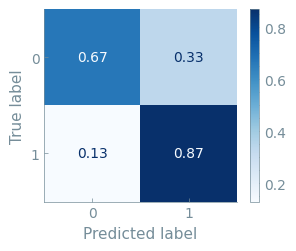

In [52]:
index_maxsize = compiled_res[compiled_res["train_size"]==max(compiled_res["train_size"])].index
conf_mats_max = [conf_mats[i] for i in index_maxsize]

actual_all, predicted_all = [], []
for index, _ in enumerate(conf_mats_max):
    preds = conf_mats_max[index]
    actual = preds["all_y_true"]
    predicted = preds["all_y_pred"]
    
    for true, pred in zip(actual, predicted):
        actual_all.append(true)
        predicted_all.append(pred)

confusion_matrix = metrics.confusion_matrix(actual_all, predicted_all)
confusion_matrix_norm = confusion_matrix.astype("float") / confusion_matrix.sum(axis=1)[:, np.newaxis]
print(confusion_matrix_norm)

cm = pycm.ConfusionMatrix(list(actual_all), list(predicted_all))
acc = cm.Overall_ACC

print(f'accuracy: {acc}')

cm_display = metrics.ConfusionMatrixDisplay(
    confusion_matrix = confusion_matrix_norm, display_labels = [0, 1])
cm_display.plot(cmap=plt.cm.Blues, include_values=True, values_format=".2f")
#plt.savefig('classif_GASIF_confusionMatrix_50_50_size45_RF.pdf', bbox_inches='tight')